<a href="https://colab.research.google.com/github/rayhankwarta/Analisis-Segmentasi-Pelanggan-Clustering-/blob/main/Analisis_Segmentasi_Pelanggan_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Segmentasi Pelanggan Menggunakan Clustering**
Dalam kasus ini, manajemen mal ingin memahami tipe-tipe pelanggan yang mereka miliki agar dapat merancang strategi pemasaran yang lebih efektif. Tugas Anda adalah mengelompokkan pelanggan ke dalam segmen-segmen berbeda berdasarkan pola belanja mereka.

# **Tujuan Proyek**

*   Mempraktikkan teknik unsupervised learning untuk menemukan grup alami di dalam data.
*   Menggunakan algoritma K-Means, salah satu metode clustering paling populer, untuk melakukan segmentasi.
*   Menentukan Jumlah Cluster Optimal menggunakan Elbow Method untuk menemukan jumlah segmen pelanggan yang paling masuk akal.
*   Menerjemahkan hasil clustering menjadi profil pelanggan (persona) yang dapat ditindaklanjuti oleh tim pemasaran.

Dataset ini berisi informasi dasar tentang pelanggan mal:

*   Age: Usia
* Gender: Jenis kelamin
* Annual Income (k$): Pendapatan tahunan (dalam ribuan dolar)
* Spending Score (1-100): Skor yang diberikan mal berdasarkan perilaku belanja pelanggan (semakin tinggi, semakin sering/banyak berbelanja).





In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


In [2]:
import pandas as pd
import os

# Construct the full file path
file_path = os.path.join(path, 'Mall_Customers.csv')

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows and information about the dataframe
display(df.head())
display(df.info())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


None

In [4]:
# Mengimpor pustaka yang diperlukan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Memuat dataset
# Construct the full file path
file_path = os.path.join(path, 'Mall_Customers.csv') # Fix: Use the 'path' variable from the download step
df = pd.read_csv(file_path)

# --- Preprocessing Data ---

# 1. Menghapus kolom yang tidak relevan (CustomerID)
df_processed = df.drop('CustomerID', axis=1)

# 2. Encoding fitur 'Gender' (Male=1, Female=0)
df_processed['Gender'] = df_processed['Gender'].map({'Male': 1, 'Female': 0})

# 3. Standardisasi (Scaling) semua fitur
# Ini membuat semua fitur memiliki skala yang sama
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_processed)

# Mengubah hasil scaling kembali menjadi DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_processed.columns)

print("Data Setelah Diproses dan Distandardisasi:")
print(df_scaled.head())

Data Setelah Diproses dan Distandardisasi:
     Gender       Age  Annual Income (k$)  Spending Score (1-100)
0  1.128152 -1.424569           -1.738999               -0.434801
1  1.128152 -1.281035           -1.738999                1.195704
2 -0.886405 -1.352802           -1.700830               -1.715913
3 -0.886405 -1.137502           -1.700830                1.040418
4 -0.886405 -0.563369           -1.662660               -0.395980


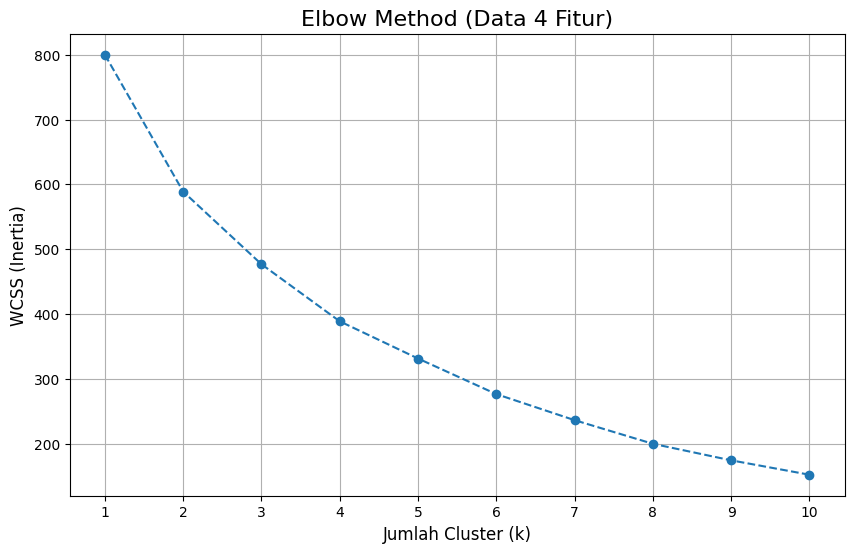


Berdasarkan grafik, titik 'siku' bisa diinterpretasikan pada k=4 atau k=6.
Mari kita coba gunakan k=6 untuk segmentasi yang lebih detail.


In [5]:
# Menggunakan Elbow Method pada data yang sudah di-scaling
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Membuat plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method (Data 4 Fitur)', fontsize=16)
plt.xlabel('Jumlah Cluster (k)', fontsize=12)
plt.ylabel('WCSS (Inertia)', fontsize=12)
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

print("\nBerdasarkan grafik, titik 'siku' bisa diinterpretasikan pada k=4 atau k=6.")
print("Mari kita coba gunakan k=6 untuk segmentasi yang lebih detail.")

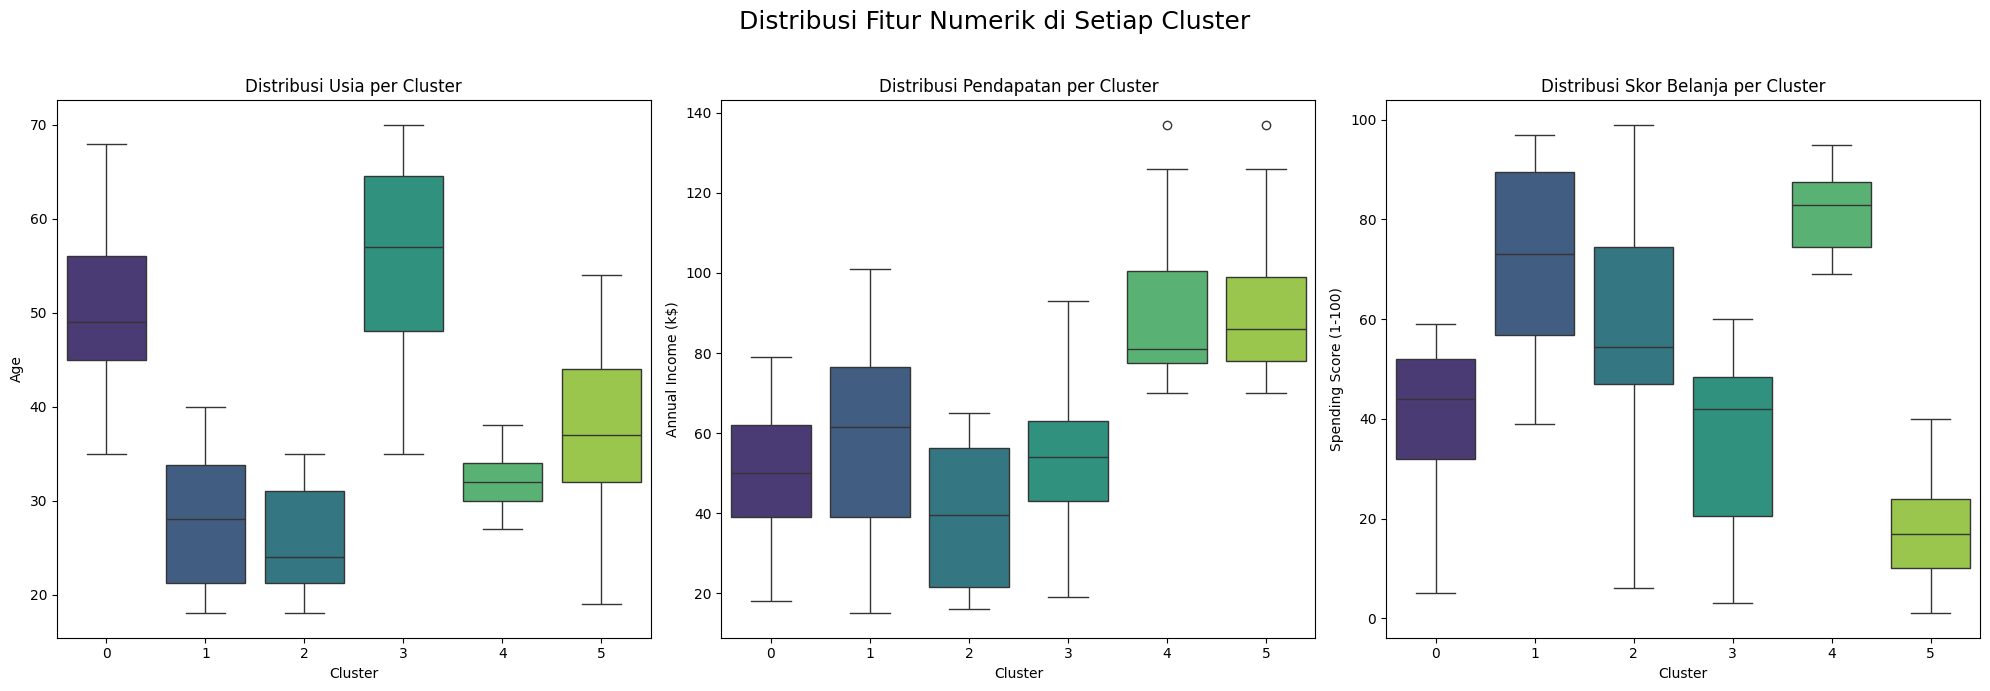

In [8]:
# Menganalisis karakteristik cluster dengan Box Plot

# Menyiapkan area plot dengan 3 subplot (1 baris, 3 kolom)
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle('Distribusi Fitur Numerik di Setiap Cluster', fontsize=18)

# Box Plot untuk Usia (Age)
sns.boxplot(ax=axes[0], x='Cluster', y='Age', data=df, palette='viridis')
axes[0].set_title('Distribusi Usia per Cluster')

# Box Plot untuk Pendapatan Tahunan (Annual Income)
sns.boxplot(ax=axes[1], x='Cluster', y='Annual Income (k$)', data=df, palette='viridis')
axes[1].set_title('Distribusi Pendapatan per Cluster')

# Box Plot untuk Skor Belanja (Spending Score)
sns.boxplot(ax=axes[2], x='Cluster', y='Spending Score (1-100)', data=df, palette='viridis')
axes[2].set_title('Distribusi Skor Belanja per Cluster')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<Figure size 1000x800 with 0 Axes>

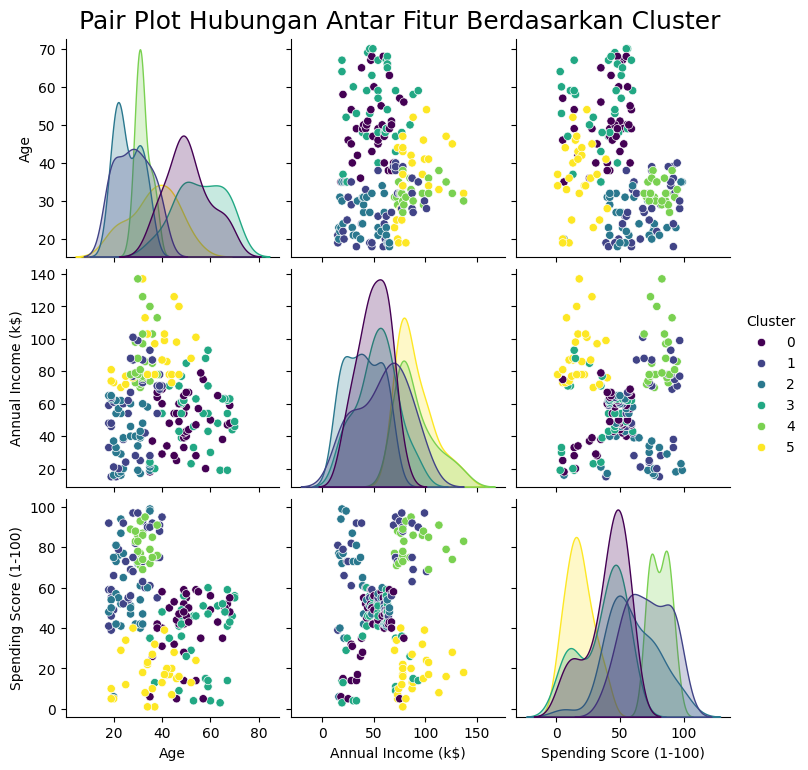

In [9]:
# Membuat Pair Plot untuk melihat hubungan antar semua fitur, diwarnai berdasarkan cluster
# Kita akan menggunakan DataFrame asli yang sudah ada kolom 'Cluster'-nya

# Menghapus CustomerID karena tidak relevan untuk plot
pairplot_df = df.drop('CustomerID', axis=1)

plt.figure(figsize=(10, 8))
sns.pairplot(pairplot_df, hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot Hubungan Antar Fitur Berdasarkan Cluster', y=1.02, fontsize=18)
plt.show()

In [6]:
# A. Melatih model K-Means dengan k=6
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(df_scaled)

# Menambahkan label cluster ke DataFrame asli
df['Cluster'] = y_kmeans


# B. Menggunakan PCA untuk mengurangi dimensi dari 4 menjadi 2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Membuat DataFrame baru dari hasil PCA
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = y_kmeans # Menambahkan label cluster ke DataFrame PCA

print("\nData setelah PCA dan penambahan label cluster:")
print(df_pca.head())


Data setelah PCA dan penambahan label cluster:
        PC1       PC2  Cluster
0 -0.406383 -0.520714        1
1 -1.427673 -0.367310        1
2  0.050761 -1.894068        2
3 -1.694513 -1.631908        2
4 -0.313108 -1.810483        2


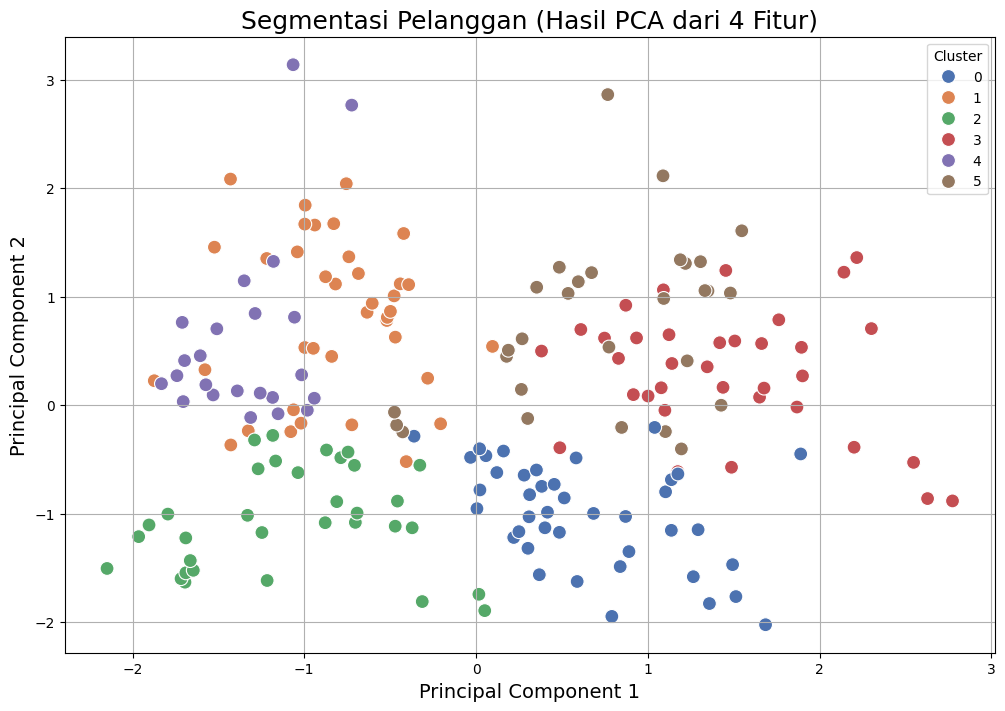



Karakteristik Rata-rata Setiap Cluster:
         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         74.512195  50.609756           49.658537               40.146341
1         98.342105  28.105263           58.342105               71.315789
2         52.294118  26.000000           39.529412               59.500000
3         82.942857  55.628571           52.828571               36.200000
4        166.434783  32.086957           90.000000               81.391304
5        165.482759  36.482759           89.517241               18.000000


In [7]:
# A. Visualisasi hasil clustering pada komponen PCA
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='deep', s=100)
plt.title('Segmentasi Pelanggan (Hasil PCA dari 4 Fitur)', fontsize=18)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
print("\n" + "="*50 + "\n")


# B. Menganalisis karakteristik setiap cluster
# Kita lihat rata-rata nilai fitur asli untuk setiap cluster
cluster_characteristics = df.groupby('Cluster').mean(numeric_only=True)
print("Karakteristik Rata-rata Setiap Cluster:")
print(cluster_characteristics)